# Q2.2 Dual PCA of Yale Face Database
## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [10,5]

## Importing Yale Face Dababase

In [2]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

## In Dual PCA if A has dimensions n by t then n >> t
## Taking first t-number of images for training

In [3]:
t = 150
X = np.array(data['fea'])[:t,:].T

In [4]:
Xmean = X.mean(axis=1,keepdims=True)
Xm = X - Xmean

In [5]:
print(Xm.shape)

(4096, 150)


## Visualizing one of the sample image

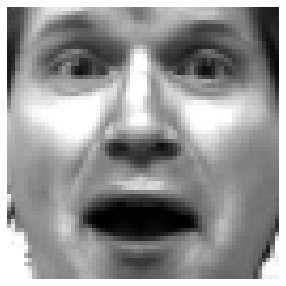

In [6]:
img = plt.imshow(X[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

## Calculating At*A

In [7]:
XtX = np.matmul(Xm.T,Xm)

In [8]:
print(XtX.shape)

(150, 150)


## Calculating Eigen values of At*A

In [9]:
eigValues, eigVectors = np.linalg.eigh(XtX)

In [10]:
print(eigValues)

[-9.31601916e-09 -1.81932104e-09  2.50805120e-11  6.21710919e+04
  8.59125556e+04  2.04228862e+05  2.11942004e+05  2.27778287e+05
  2.45877139e+05  2.48935034e+05  2.61768761e+05  2.81587371e+05
  2.87727134e+05  2.94493510e+05  2.99302549e+05  3.04625394e+05
  3.09637639e+05  3.23721047e+05  3.32884885e+05  3.38567033e+05
  3.57493821e+05  3.61945240e+05  3.66792327e+05  3.76439271e+05
  3.86853324e+05  3.99484472e+05  4.05011945e+05  4.18832856e+05
  4.28724230e+05  4.30747311e+05  4.43266343e+05  4.55533425e+05
  4.59853149e+05  4.70594424e+05  4.74707029e+05  4.89340006e+05
  5.16791173e+05  5.26939777e+05  5.30587323e+05  5.43556548e+05
  5.71222769e+05  5.77657089e+05  5.81025461e+05  5.94021592e+05
  6.01079311e+05  6.08513227e+05  6.16588876e+05  6.55173458e+05
  6.75456752e+05  6.87058278e+05  6.95057133e+05  7.09786552e+05
  7.23948716e+05  7.37620959e+05  7.63339470e+05  7.72923728e+05
  7.95124296e+05  8.00871360e+05  8.38725093e+05  8.66622898e+05
  8.83355570e+05  8.98292

## Sorting eigen values in descending values and changing order of 
## eigen vectors correspondingly

In [11]:
idx = eigValues.argsort()[::-1]   
eigValues = eigValues[idx]
eigVectors = eigVectors[:,idx]

In [12]:
print(eigValues)

[ 3.28072532e+08  1.94280675e+08  1.70424206e+08  8.18420061e+07
  7.47329422e+07  5.72544262e+07  4.08503725e+07  3.51661170e+07
  2.91281971e+07  2.56679223e+07  2.46460019e+07  2.00183011e+07
  1.86918862e+07  1.71881454e+07  1.42187369e+07  1.30195907e+07
  1.19870162e+07  1.16768149e+07  1.06054777e+07  1.03605883e+07
  9.27090838e+06  7.99443808e+06  7.79122096e+06  7.37659104e+06
  6.84549167e+06  6.68814138e+06  6.34470343e+06  5.92610205e+06
  5.67220922e+06  5.58171194e+06  5.36278682e+06  5.02710731e+06
  4.71018644e+06  4.48642508e+06  4.16951502e+06  3.93203933e+06
  3.84817695e+06  3.56516647e+06  3.52343595e+06  3.50437004e+06
  3.17320774e+06  3.05251301e+06  2.97347169e+06  2.94613938e+06
  2.81075972e+06  2.63171136e+06  2.58928405e+06  2.47879183e+06
  2.39260104e+06  2.36096126e+06  2.27632881e+06  2.22494229e+06
  2.17793057e+06  2.04949479e+06  2.03311434e+06  1.93664368e+06
  1.89244886e+06  1.85114296e+06  1.77591272e+06  1.74280119e+06
  1.70253015e+06  1.63786

In [13]:
eigVals = eigValues.copy()

## Creating Singular value matrix

In [14]:
D = abs(eigVals)**0.5
D = np.diag(D)

In [15]:
print(D)

[[1.81127726e+04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.39384603e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.30546622e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.00804473e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.26534998e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.65195274e-05]]


## Visualizing Singular values matrix pattern

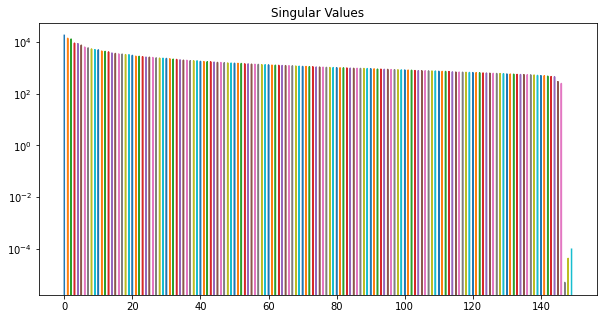

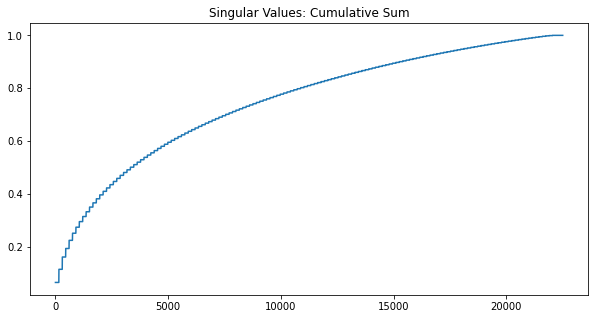

In [16]:
plt.figure(1)
plt.semilogy(D)
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(D)/np.sum(D))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## Formint V.transpose() Matrix

In [17]:
Vt = eigVectors.copy().T

## Reconstruction of Training data
## xcap = X**V**Vt

In [18]:
Y = D @ Vt

In [19]:
Xcap = X @ Vt.T @ np.linalg.inv(D) @ Y

In [20]:
print(Xcap.shape)

(4096, 150)


## Visualizing Reconstructed Data

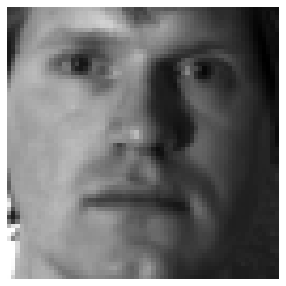

In [21]:
img = plt.imshow(Xcap[:,5].reshape(64,64).T)
img.set_cmap('gray')
plt.axis('off')
plt.show()

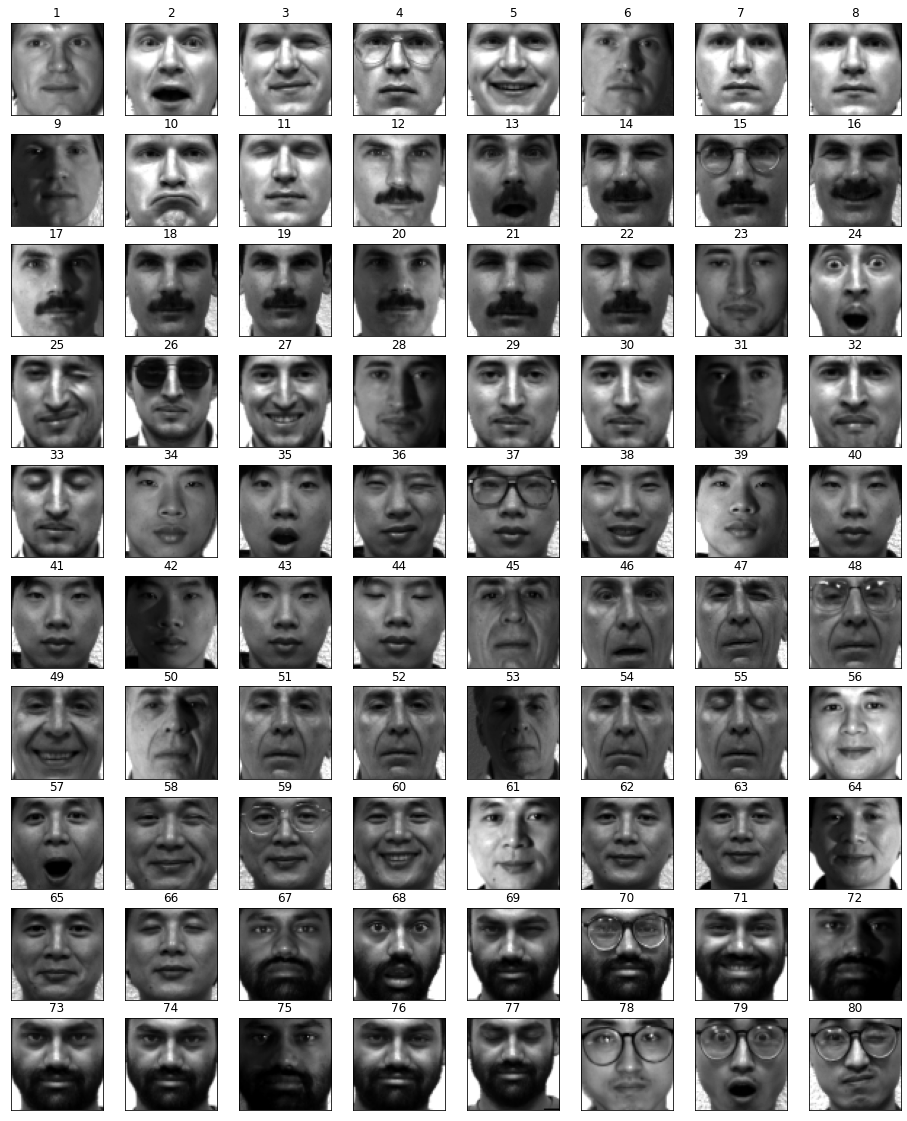

In [22]:
plt.figure(figsize=(16,20))
for i in range(1,81):
    plt.subplot(10,8,i,xticks=[],yticks=[])
    img = plt.imshow(Xcap[:,i-1].reshape(64,64).T,cmap='gray')
    plt.title(f'{i}')
    plt.plot()

## Reconstruction of Test Data
### ycap = X**V**(Σ^−2)**Vt**Xtx

### Calculating D inverse

In [23]:
invD_sq = np.linalg.inv(np.matmul(D,D))

### Getting test data
### here t is sample_size intially defined
### so we're taking 165-t images as test data

In [24]:
X_test = np.array(data['fea'])[t:,:].T

### Projecting test data

In [25]:
y = np.linalg.inv(D) @ Vt.T @ X.T @ X_test

### Reconstructing test data

In [26]:
x_reconstruct = X @ Vt.T @ np.linalg.inv(D) @ y

### Visualizing test data

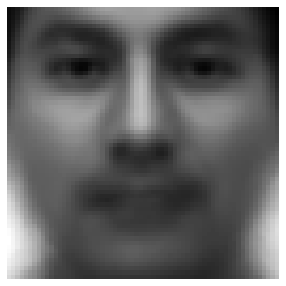

In [27]:
img = plt.imshow(x_reconstruct[:,6].reshape(64,64).T)
img.set_cmap('gray')
plt.axis('off')
plt.show()

## In Dual PCA, in most cases reconstruction of test data 
## i.e. out of sample reconstruction is not possible